In [1]:
%run Read_Tuolumne_data.ipynb #run this cell to load data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: ASO Tuolumne basin machine learning and geostatistics data set
    contains: SWE depth maps from 16 Airborne Snow Observatory lidar scans (2016-2019)  and "static" terrain parameters from the SRTM DEM and the National Land Cover Database
    location: Tuolumne basin (around Hetch Hetch Reservoir), in the Californian Sierra Nevada
    time period: Multiple flights in the snow seasons 2016, 2017, 2018, and 2019
    georeferencing: Pixels/cells are regularly spaced in zone 11S of the UTM projection based on the WGS84 ellipsoid.
    convention: By convention, the first pixel (i.e.: row index i=1, column index j=1) is in the upper left corner of the image.
    dimensions: The image stack "D" (SWE maps) have 3 dimensions [dim1=rows=y_i=northing, dim2=columns=x_j=easting, dim3=t_n=time of flight]
    Ground sampling distance: GSD=100 meters (spatial resolution)
    easting coordinate: The easting p

In [2]:
"""Random forest regression"""
def skl_rfr(x,x_train,x_test,y_train,depth,n_trees):
    """random forest regression using sklearn"""
    regr = RandomForestRegressor(max_depth=depth, n_estimators=n_trees, random_state=0)
    regr.fit(x_train,y_train)
    y_pred_basin = regr.predict(x)#make prediction for the whole basin
    y_pred_test = regr.predict(x_test)
    y_pred_train = regr.predict(x_train)
    return y_pred_basin,y_pred_test, y_pred_train

In [5]:
"""Initialize the test and training datasets to use for varying number of trees, and varying number of estimators
    Only use 1 of the 16 passes in order for the regression to be finished in a reasonable amount of time"""
X = np.transpose(np.array([svf_clean,z_clean,northness_clean,eastness_clean,slp_clean,cc_clean]))#create matrix of all predicators
x_train, x_test, y_train, y_test = train_test_split(X,D_clean[:,0],test_size=0.8)

In [ ]:
"""Varying the number of trees"""
n_trees = np.arange(1,50)
y_pred_basin_n_trees = np.zeros((D_clean.shape[0],len(n_trees)))
y_pred_test_n_trees = np.zeros((y_test.shape[0],len(n_trees)))
y_pred_train_n_trees = np.zeros((y_train.shape[0],len(n_trees)))

for i in n_trees:
    #iteratively increase the number of trees in the regression and store in arrays
    print(i)
    y_pred_basin_n_trees[:,i-1],y_pred_test_n_trees[:,i-1], y_pred_train_n_trees[:,i-1] = skl_rfr(X,x_train,x_test,y_train,15,i)
    
    
    #
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [4]:
"""Find MSE as function depth"""
n_depth = np.arange(1,50)
y_pred_basin_n_d = np.zeros((D_clean.shape[0],len(n_depth)))
y_pred_test_n_d = np.zeros((y_test.shape[0],len(n_depth)))
y_pred_train_n_d = np.zeros((y_train.shape[0],len(n_depth)))

for i in n_depth:
    #iteratively increase the depth in the regression and store in arrays
    print(i)
    y_pred_basin_n_d[:,i-1],y_pred_test_n_d[:,i-1], y_pred_train_n_d[:,i-1] = skl_rfr(X,x_train,x_test,y_train,i,20)
    Bias_trees[i] = np.mean((y_test - np.mean(y_pred_test_n_d[:,i-1]))**2)
    variance_trees[i] = np.var(y_pred_test_n_trees[:,i])

1


NameError: name 'x_train' is not defined

In [ ]:
#X = np.transpose(np.array([svf_clean,z_clean,northness_clean,eastness_clean,slp_clean,cc_clean]))#create matrix of all predicators
#x_train, x_test, y_train, y_test = train_test_split(X,D_clean,test_size=0.2)
#y_pred_basin,y_pred_test, y_pred_train = skl_rfr(X,x_train,x_test,y_train,20,20)

In [ ]:
"""Save files for posterity"""

"""np.savetxt('test_runs/' + 'y_pred_basin_n_trees.txt', y_pred_basin_n_trees)
np.savetxt('test_runs/' + 'y_pred_test_n_trees.txt', y_pred_test_n_trees)
np.savetxt('test_runs/' + 'y_pred_train_n_trees.txt', y_pred_train_n_trees)

np.savetxt('test_runs/' + 'y_pred_basin_n_d.txt', y_pred_basin_n_d)
np.savetxt('test_runs/' + 'y_pred_test_n_d.txt', y_pred_test_n_d)
np.savetxt('test_runs/' + 'y_pred_train_n_d.txt', y_pred_train_n_d)
np.savetxt('test_runs/' + 'y_test.txt',y_test)
np.savetxt('test_runs/' + 'y_train.txt',y_train)"""


In [6]:
"""Find MSE and R2 as function of number of trees"""
n_trees = np.arange(1,50)

#Create empty arrays for storage
MSE_basin_rnd_forest = np.zeros(len(n_trees))
MSE_test_rnd_forest = np.zeros(len(n_trees))
MSE_train_rnd_forest = np.zeros(len(n_trees))
R2_test_rnd_forest = np.zeros(len(n_trees))
Bias_trees = np.zeros(len(n_trees))
variance_trees = np.zeros(len(n_trees))

"""Unfortunately the test files i created were to large to upload to github 
   so i had to restructrure this part last minute"""
#y_pred_basin_n_trees = np.loadtxt("test_runs/y_pred_basin_n_trees.txt")
#y_pred_test_n_trees = np.loadtxt("test_runs/y_pred_test_n_trees.txt")
#y_pred_train_n_trees = np.loadtxt("test_runs/y_pred_train_n_trees.txt")
#y_test = np.loadtxt('test_runs/y_test.txt')
#y_train = np.loadtxt('test_runs/y_train.txt')

for i in range(len(n_trees)):
    MSE_basin_rnd_forest[i] = metric.mean_squared_error(D_clean[:,0],y_pred_basin_n_trees[:,i])
    MSE_train_rnd_forest[i] = metric.mean_squared_error(y_train,y_pred_train_n_trees[:,i])
    MSE_test_rnd_forest[i] = metric.mean_squared_error(y_test,y_pred_test_n_trees[:,i])
    R2_test_rnd_forest[i] = metric.r2_score(y_test,y_pred_test_n_trees[:,i])
    Bias_trees[i] = np.mean((y_test - np.mean(y_pred_test_n_trees[:,i]))**2)
    variance_trees[i] = np.var(y_pred_test_n_trees[:,i])
#polydeg_array = np.arange(1,MaxPoly+1) #Plot the MSE results against each other


plt.rcParams['font.size'] = 18
plt.figure(figsize=(10,6))
color = 'tab:red'
plt.xlabel('Number of Trees')
plt.ylabel('R$^2$', color=color)
plt.plot(n_trees,R2_test_rnd_forest, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R$^2$ vs Number of Trees')
ax2 = plt.gca().twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(n_trees, MSE_test_rnd_forest, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/MSE_R2_vs_trees.png')
plt.show()


plt.rcParams['font.size'] = 18
plt.figure(figsize = [10,10])
plt.plot(Bias_trees,label = 'Bias')
plt.plot(variance_trees,label = 'Variance')

plt.xlabel("Number of trees")
plt.ylabel("")
plt.title('Bias Variance')
plt.legend(); plt.grid(); plt.semilogy()
plt.savefig('figs/bias_variance_trees.png')
plt.show()
#delete to save memory
del y_pred_basin_n_trees
del y_pred_test_n_trees 
del y_pred_train_n_trees

NameError: name 'y_pred_basin_n_trees' is not defined

15


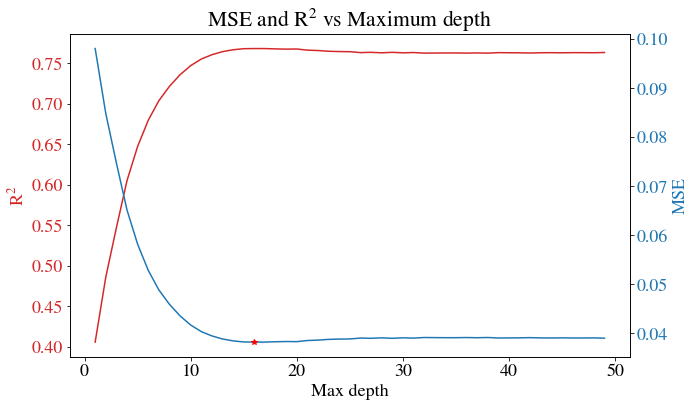

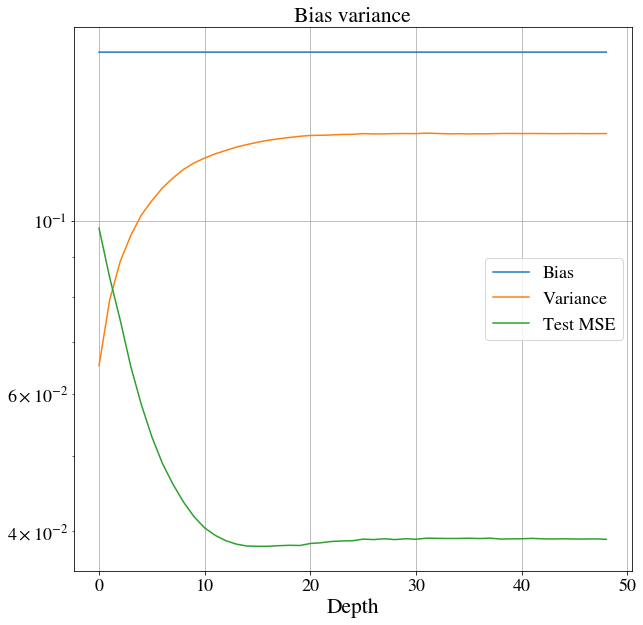

In [14]:
"""Find MSE and R2 as function of depth"""
n_depth = np.arange(1,50)
y_pred_basin_n_d = np.loadtxt("test_runs/y_pred_basin_n_d.txt")
y_pred_test_n_d = np.loadtxt("test_runs/y_pred_test_n_d.txt")
y_pred_train_n_d = np.loadtxt("test_runs/y_pred_train_n_d.txt")
y_test = np.loadtxt('test_runs/y_test.txt')
y_train = np.loadtxt('test_runs/y_train.txt')

Bias_d = np.zeros(len(n_depth))
variance_d = np.zeros(len(n_depth))

"""Find MSE as function of depth"""
MSE_basin_rnd_forest_d = np.zeros(len(n_depth))
MSE_test_rnd_forest_d = np.zeros(len(n_depth))
MSE_train_rnd_forest_d = np.zeros(len(n_depth))
R2_test_rnd_forest_d = np.zeros(len(n_depth))
for i in range(len(n_depth)):
    MSE_basin_rnd_forest_d[i] = metric.mean_squared_error(D_clean[:,0],y_pred_basin_n_d[:,i])
    MSE_train_rnd_forest_d[i] = metric.mean_squared_error(y_train,y_pred_train_n_d[:,i])
    MSE_test_rnd_forest_d[i] = metric.mean_squared_error(y_test,y_pred_test_n_d[:,i])
    R2_test_rnd_forest_d[i] = metric.r2_score(y_test,y_pred_test_n_d[:,i])
    Bias_d[i] = np.mean((y_test - np.mean(y_pred_test_n_d[:,i]))**2)
    variance_d[i] = np.var(y_pred_test_n_d[:,i])
    
min_idx = np.argmin(MSE_test_rnd_forest_d)
print(min_idx)

plt.rcParams['font.size'] = 18
plt.figure(figsize=(10,6))
color = 'tab:red'
plt.xlabel('Max depth')
plt.ylabel('R$^2$', color=color)
plt.plot(n_depth,R2_test_rnd_forest_d, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.title('MSE and R$^2$ vs Maximum depth')
ax2 = plt.gca().twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(n_depth, MSE_test_rnd_forest_d, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(n_depth[min_idx],MSE_test_rnd_forest_d[min_idx],'*',color = 'r')
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/MSE_R2_vs_depth.png')
plt.show()


plt.rcParams['font.size'] = 18
plt.figure(figsize = [10,10])
plt.plot(Bias_d,label = 'Bias')
plt.plot(variance_d,label = 'Variance')
plt.plot(MSE_test_rnd_forest_d,label = 'Test MSE')
plt.xlabel("Depth",fontsize="large")

plt.title('Bias variance')
plt.legend(); plt.grid(); plt.semilogy()
plt.savefig('figs/Bias_variance_v_depth.png')
plt.show()


In [3]:

"""Run the algorithm for all ASO passes with optimized hyperparameters"""
X = np.transpose(np.array([svf_clean,z_clean,northness_clean,eastness_clean,slp_clean,cc_clean]))#create matrix of all predicators
x_train, x_test, y_train, y_test = train_test_split(X,D_clean,test_size=0.8)

depth = 16
n_trees = 20
MSE_basin = np.zeros(16)
MSE_test = np.zeros(16)
MSE_train = np.zeros(16)

y_test_predictions = np.zeros(y_test.shape)
y_train_predictions = np.zeros(y_train.shape)
y_basin_predictions = np.zeros(D_clean.shape)
R2_test = np.zeros(16)
print(y_train.shape)
for i in range(16):
    print(i)
    ypred_basin,ypred_test, ypred_train = skl_rfr(X,x_train,x_test,y_train[:,i],depth,n_trees)
    MSE_basin[i] = metric.mean_squared_error(D_clean[:,i],ypred_basin)
    MSE_train[i] = metric.mean_squared_error(y_train[:,i],ypred_train)
    MSE_test[i] = metric.mean_squared_error(y_test[:,i],ypred_test)
    R2_test[i] = metric.r2_score(y_test[:,i],ypred_test)
    y_test_predictions[:,i] = ypred_test
    y_train_predictions[:,i] =  ypred_train
    y_basin_predictions[:,i] = ypred_basin

(32158, 16)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


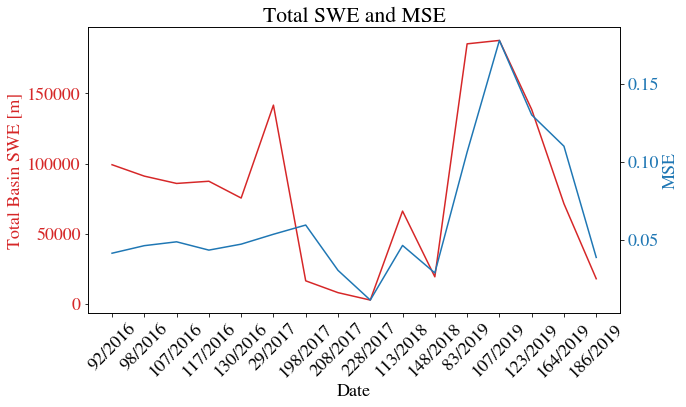

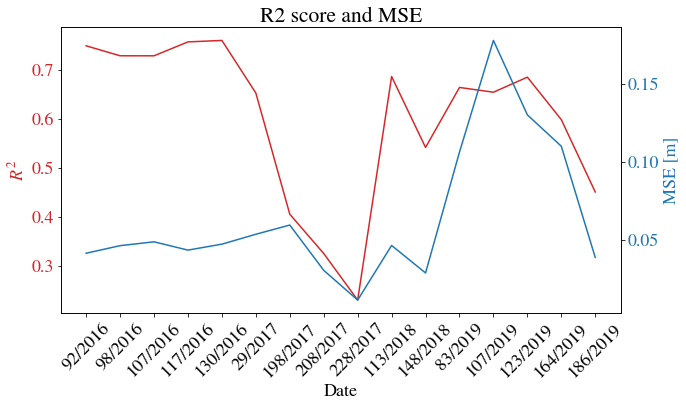

In [19]:
date = [] 
for i in range(16):
    date.append(np.str(DOY[i]) + '/' + np.str(year[i]))
    
"""Find the total SWE for each year"""
D_sum = np.zeros(16)
for i in range(16):
    h = D[:,:,i][np.logical_not(np.isnan(D[:,:,i]))]
    D_sum[i] = np.sum(h)

D_max_idx = np.argmax(D_sum)
D_min_idx = np.argmin(D_sum)

plt.figure(figsize=(10,6))
color = 'tab:red'
plt.xlabel('Date')
plt.ylabel('Total Basin SWE [m]', color=color)
plt.plot(D_sum, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.xticks( np.arange(16), date ,rotation = 45)
plt.title('Total SWE and MSE')
ax2 = plt.gca().twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot( MSE_test, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/MSE_SWE_RF.png')
plt.show()


plt.figure(figsize=(10,6))
color = 'tab:red'
plt.xlabel('Date')
plt.ylabel('$R^2$', color=color)
plt.plot(R2_test, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.xticks( np.arange(16), date ,rotation = 45)
plt.title('R2 score and MSE')
ax2 = plt.gca().twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('MSE [m]', color=color)  # we already handled the x-label with ax1
ax2.plot( MSE_test, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.tight_layout()
plt.savefig('figs/R2_MSE_RF.png')
plt.show()

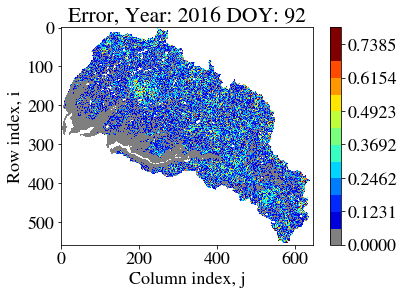

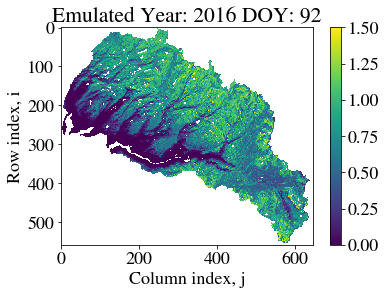

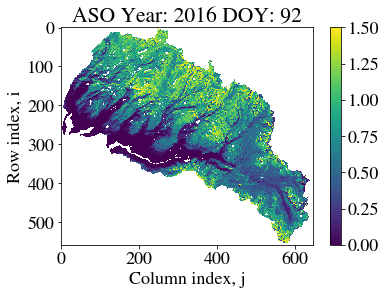

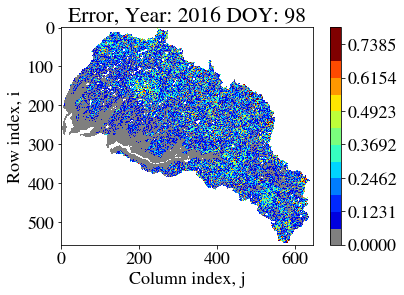

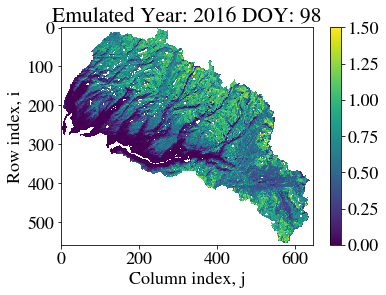

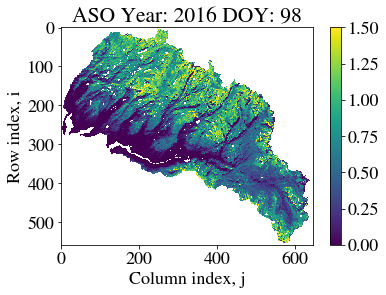

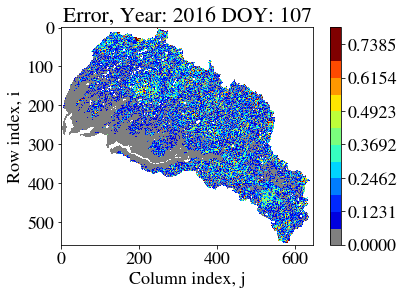

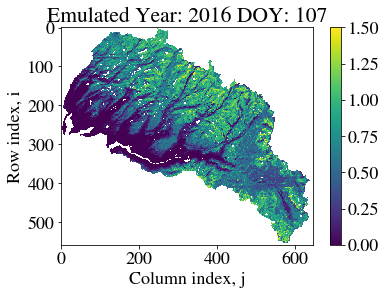

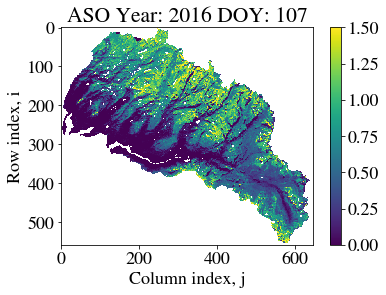

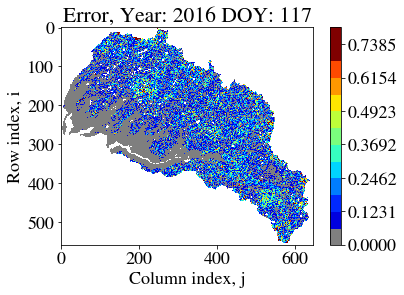

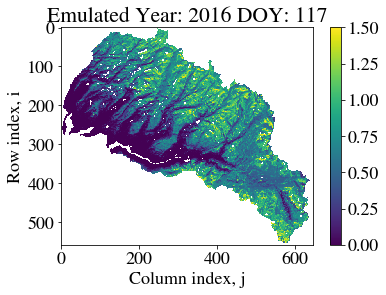

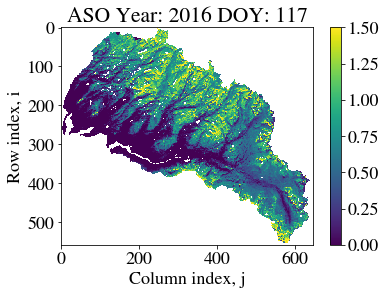

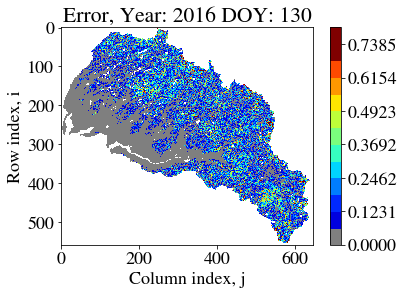

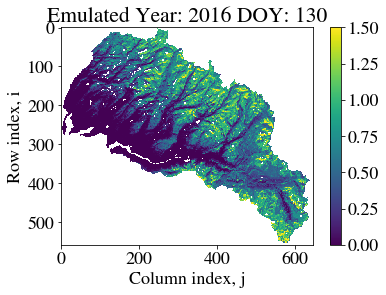

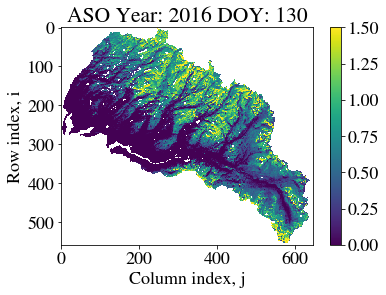

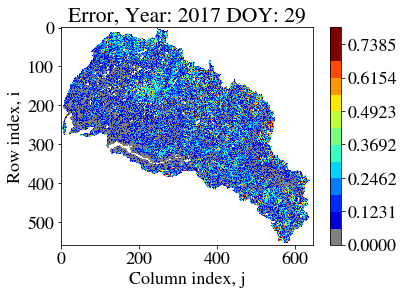

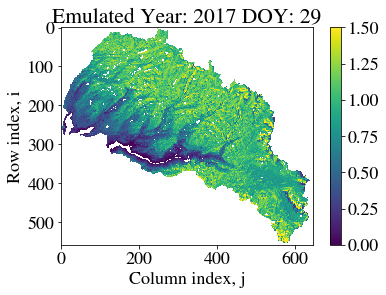

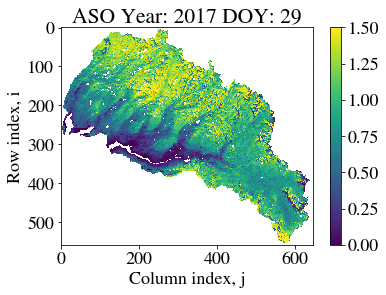

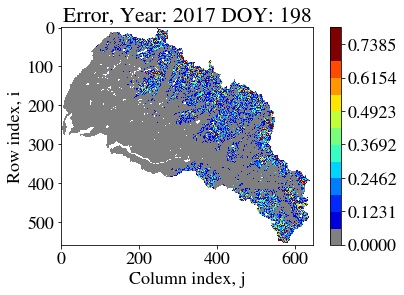

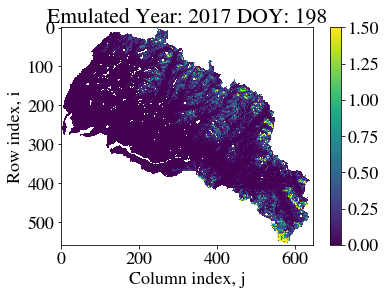

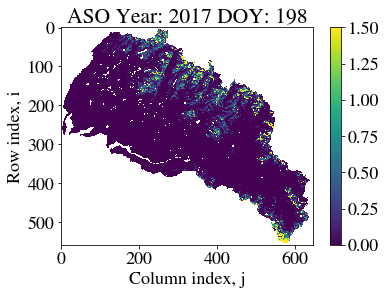

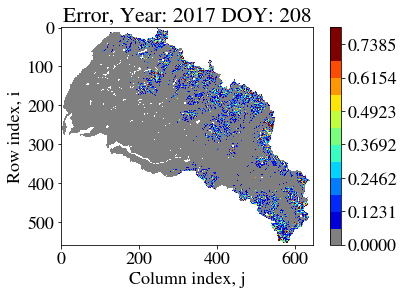

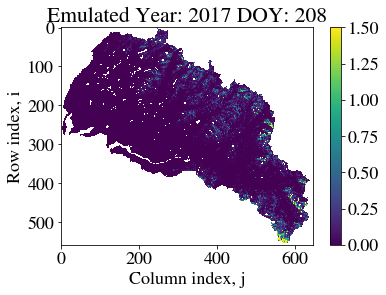

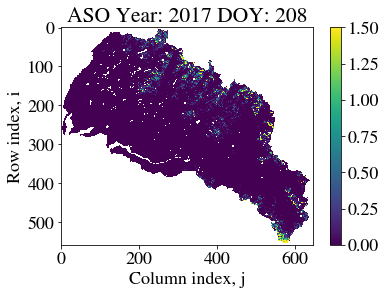

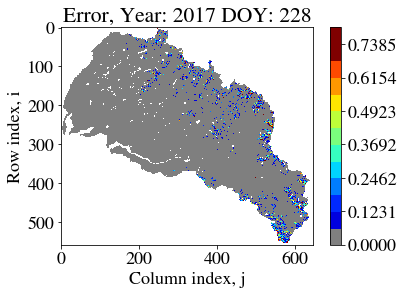

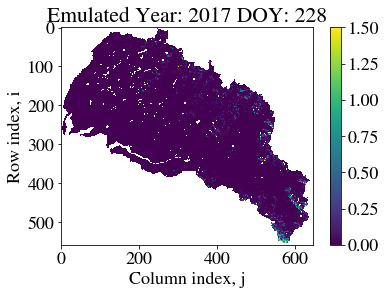

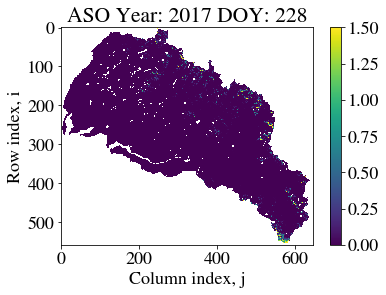

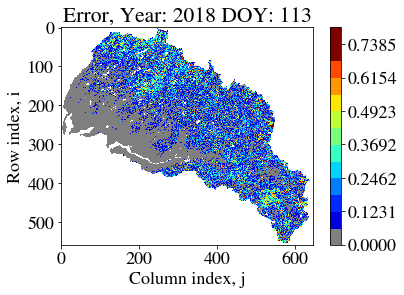

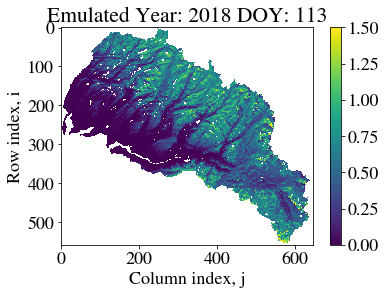

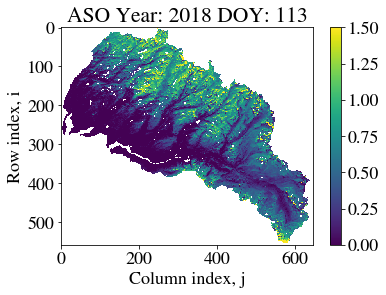

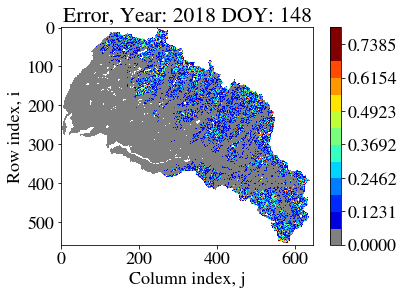

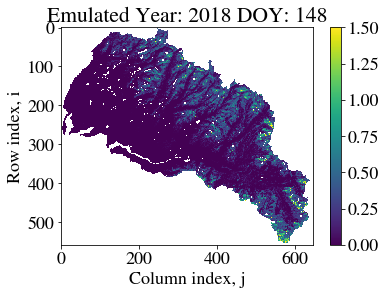

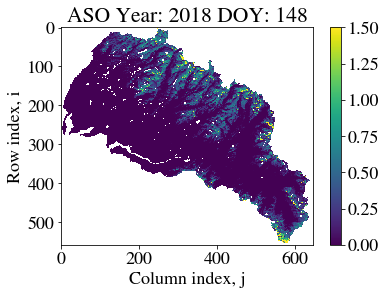

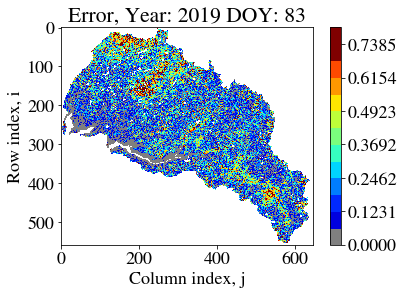

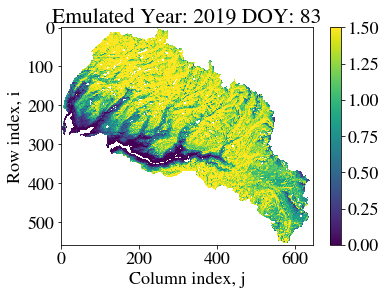

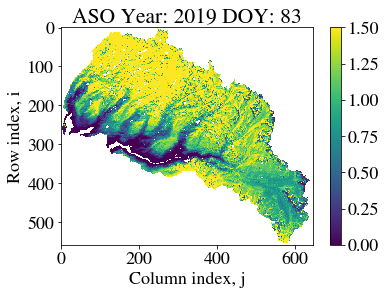

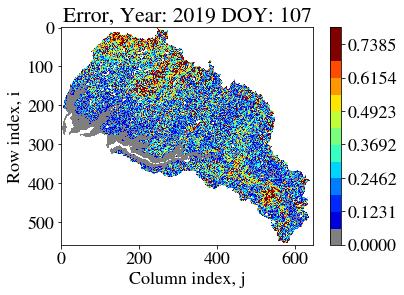

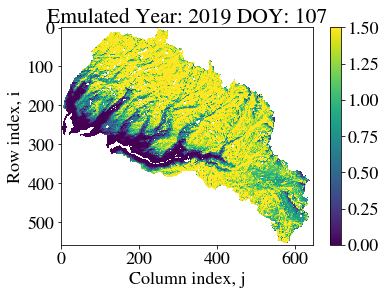

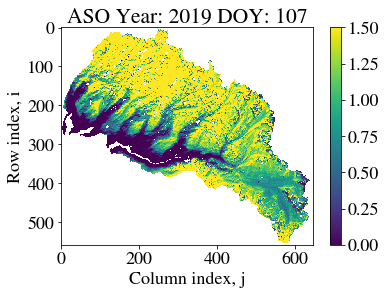

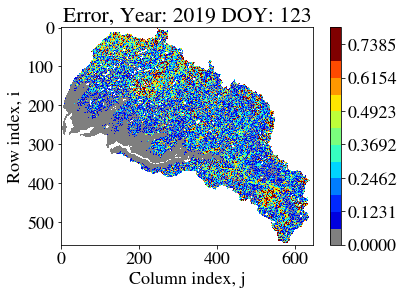

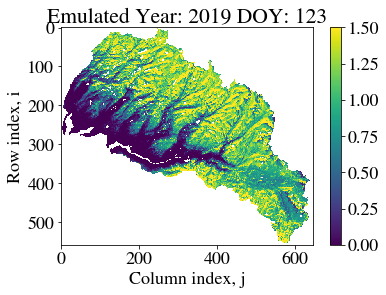

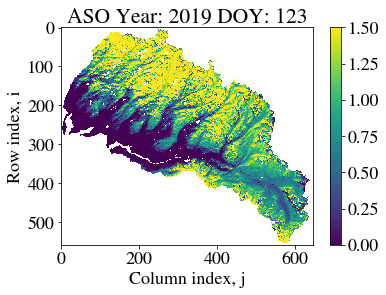

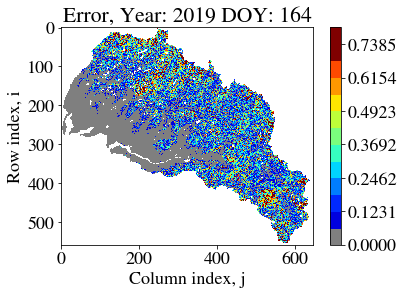

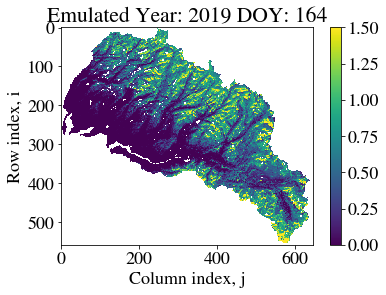

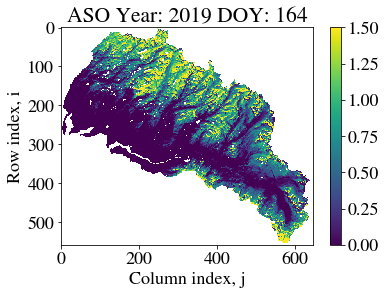

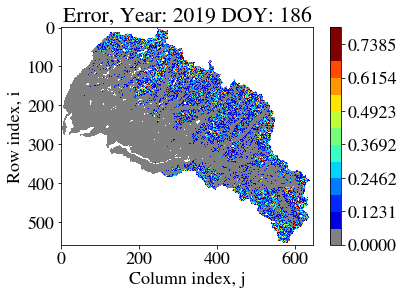

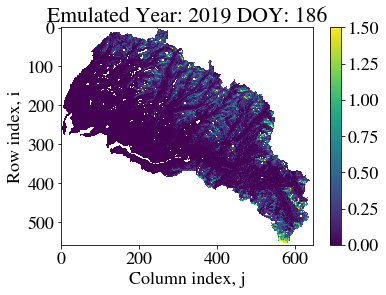

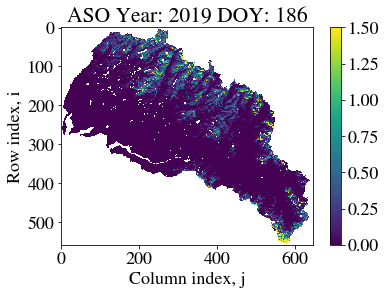

In [45]:
#Map back to coordinates for visualization
import matplotlib as mpl
def visual_map(i,save_or_not):
    D_pred=np.zeros_like(D)
    D_pred[not_nan,i]=y_basin_predictions[:,i]
    D_pred[~not_nan,i]=np.nan
    
    cmap = plt.cm.jet  # define the colormap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    cmaplist[0] = (.5, .5, .5, 1.0)
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(0, 0.8, 14)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.figure()
    cm=plt.imshow((np.abs(D_pred[:,:,i]-D[:,:,i])),cmap=cmap,norm = norm)
    plt.title('Error, Year: '+str(year[i])+' DOY: ' + str(DOY[i]))
    plt.ylabel('Row index, i')
    plt.xlabel('Column index, j')
    plt.clim(0, 0.7)
    plt.colorbar()
    if save_or_not == True:
        (print('Image saved'))
        plt.savefig('RF_Map_error' +str(year[i])+'_DOY_' + str(DOY[i])+'.png')
    plt.show()
    
    
    cm=plt.imshow((D_pred[:,:,i]))
    plt.title('Emulated Year: '+str(year[i])+' DOY: ' + str(DOY[i]))
    plt.ylabel('Row index, i')
    plt.xlabel('Column index, j')
    plt.clim(0, 1.5)
    plt.colorbar()
    if save_or_not == True:
        (print('Image saved'))
        plt.savefig('RF_Map_emulated' +str(year[i])+'_DOY_' + str(DOY[i])+'.png')
    plt.show()

    cm=plt.imshow((D[:,:,i]))
    plt.title('ASO Year: '+str(year[i])+' DOY: ' + str(DOY[i]))
    plt.ylabel('Row index, i')
    plt.xlabel('Column index, j')
    plt.clim(0, 1.5)
    plt.colorbar()
    if save_or_not == True:
        (print('Image saved'))
        plt.savefig('RF_Map_true' +str(year[i])+'_DOY_' + str(DOY[i])+'.png')
    plt.show()

for i in range(D.shape[2]):
    visual_map(i,False)

    #plt.close('all')

Image saved


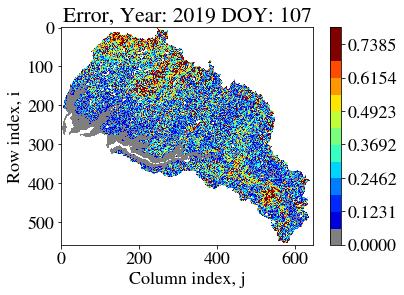

Image saved


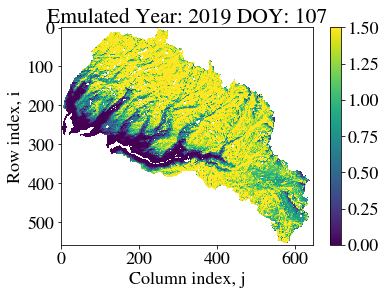

Image saved


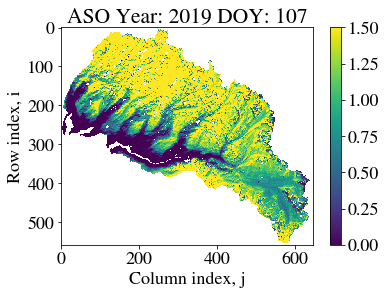

Image saved


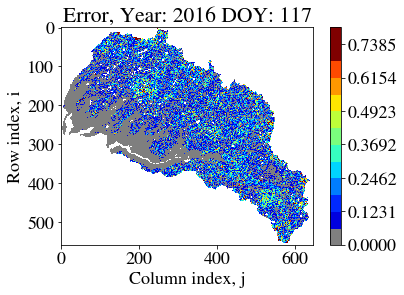

Image saved


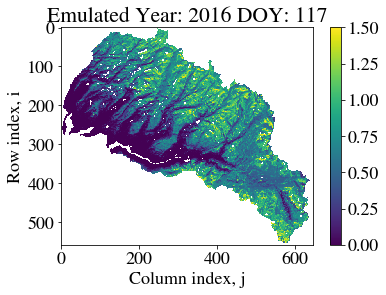

Image saved


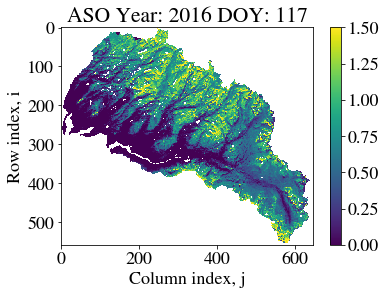

Image saved


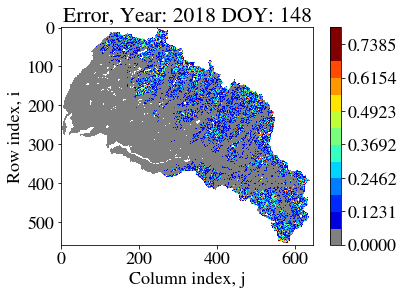

Image saved


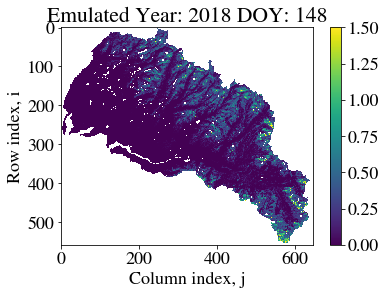

Image saved


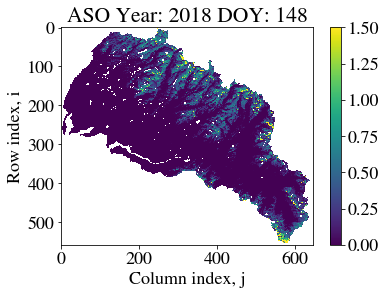

In [46]:
"""Save selected runs for report"""
#12 107/2019
#3 117/2016
#10 208/2017
visual_map(12,True)
visual_map(3,True)
visual_map(10,True)

[ 79679.28841192  73090.18899485  68916.28091768  70051.17554035
  60685.58734652 113458.49864851  13757.01258765   6730.98615259
   2368.80838489  53284.66424067  15917.36766674 148582.18344335
 150444.41619167 111270.97278946  57714.02279432  14714.70581598]
[ 79449.89217898  72958.78227924  68777.64206168  70051.95165164
  60482.65119701 113422.49619331  13234.90511463   6464.91454146
   2180.97856284  52999.21477212  15479.01204772 148325.15091554
 150353.05704898 111006.21851483  57230.4300875   14405.79775581]


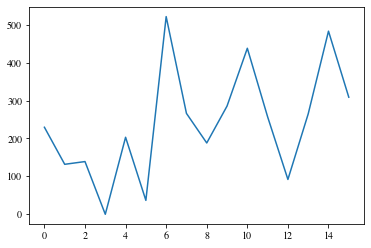

In [14]:
"""Predicted Sum SWE of each year"""
D_sum_predict = np.zeros(16)
D_sum_truth = np.zeros(16)

for i in range(16):
    h_predict = y_test_predictions[:,i]#D[][np.logical_not(np.isnan(D[:,:,i]))]
    h_truth = y_test[:,i]
    D_sum_predict[i] = np.sum(h_predict)
    D_sum_truth[i] = np.sum(h_truth)
    
print(D_sum_predict)
print(D_sum_truth)
plt.plot(D_sum_predict-D_sum_truth)
#plt.plot(D_sum_truth)
plt.show()